In [47]:
import pandas as pd

# Load the dataset from the provided CSV file
df = pd.read_csv("spotify_dataset.csv")
# Check for missing values
df.drop(['playlist_id', 'track_album_release_date', 'track_album_name', 'track_album_id',
         'track_artist', 'track_name', 'track_id','playlist_name'], axis=1, inplace=True)
df.rename(columns={'playlist_subgenre':'subgenre','liveness': 'live', 'valence': 'val','loudness':'loud','speechiness':'speech','acousticness':'acoust','instrumentalness':'instrument','duration_ms':'time','playlist_genre':'genre','track_popularity':'popular'}, inplace=True)

In [48]:
print(df.isnull().sum())

popular         0
genre           0
subgenre        0
danceability    0
energy          0
key             0
loud            0
mode            0
speech          0
acoust          0
instrument      0
live            0
val             0
tempo           0
time            0
dtype: int64


In [49]:
df["genre"].replace({"pop":1,"rap":2,"rock":3,"latin":4,"r&b":5,"edm":6},inplace=True)
df["subgenre"].replace({"album rock":1,"big room":2,"classic rock":3, "dance pop":4, "electro house":5, "electropop":6, "gangster rap":7, "hard rock":8, "hip hop":9, "hip pop":10, "indie poptimism":11, "latin hip hop":12, "latin pop":13, "neo soul":14, "new jack swing":15, "permanent wave":16, "pop edm":17, "post-teen pop":18, "progressive electro house":19, "reggaeton":20, "southern hip hop":21, "trap":22, "tropical":23, "urban contemporary":24},inplace=True)

In [50]:
df

,popular,genre,subgenre,danceability,energy,key,loud,mode,speech,acoust,instrument,live,val,tempo,time
0,66,1,4,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,67,1,4,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,70,1,4,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,60,1,4,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,69,1,4,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,6,19,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,20,6,19,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,14,6,19,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,15,6,19,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [51]:
# Split the dataset into features (X) and the target variable (y)
X = df.drop('genre', axis=1)  # Features
y = df['genre']  # Target variable (Genre)

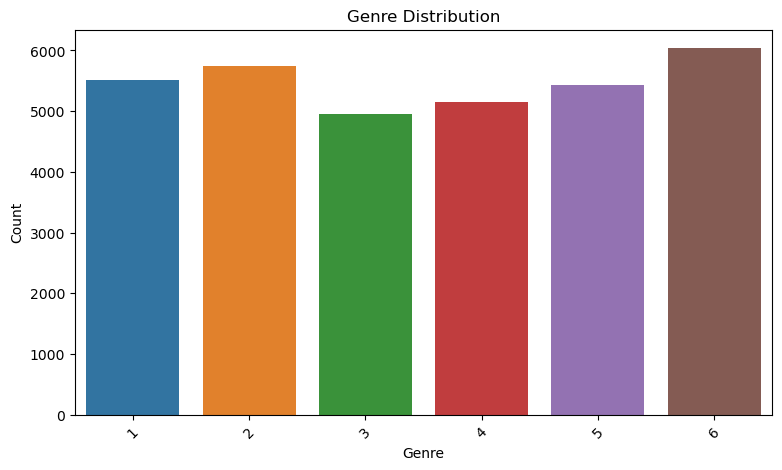

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 2: Data Analysis and Visualization

# Explore the distribution of the target variable 'genre'
plt.figure(figsize=(9, 5))
sns.countplot(x='genre', data=df)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

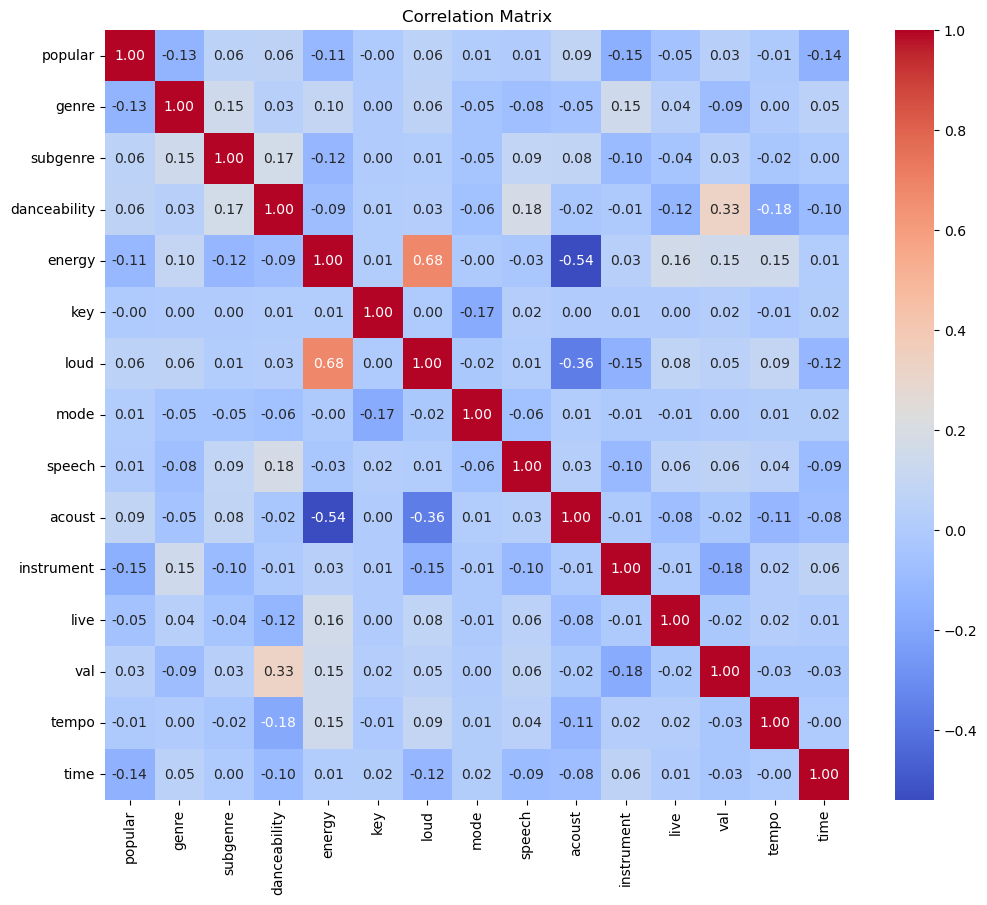

In [53]:
# Visualize the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

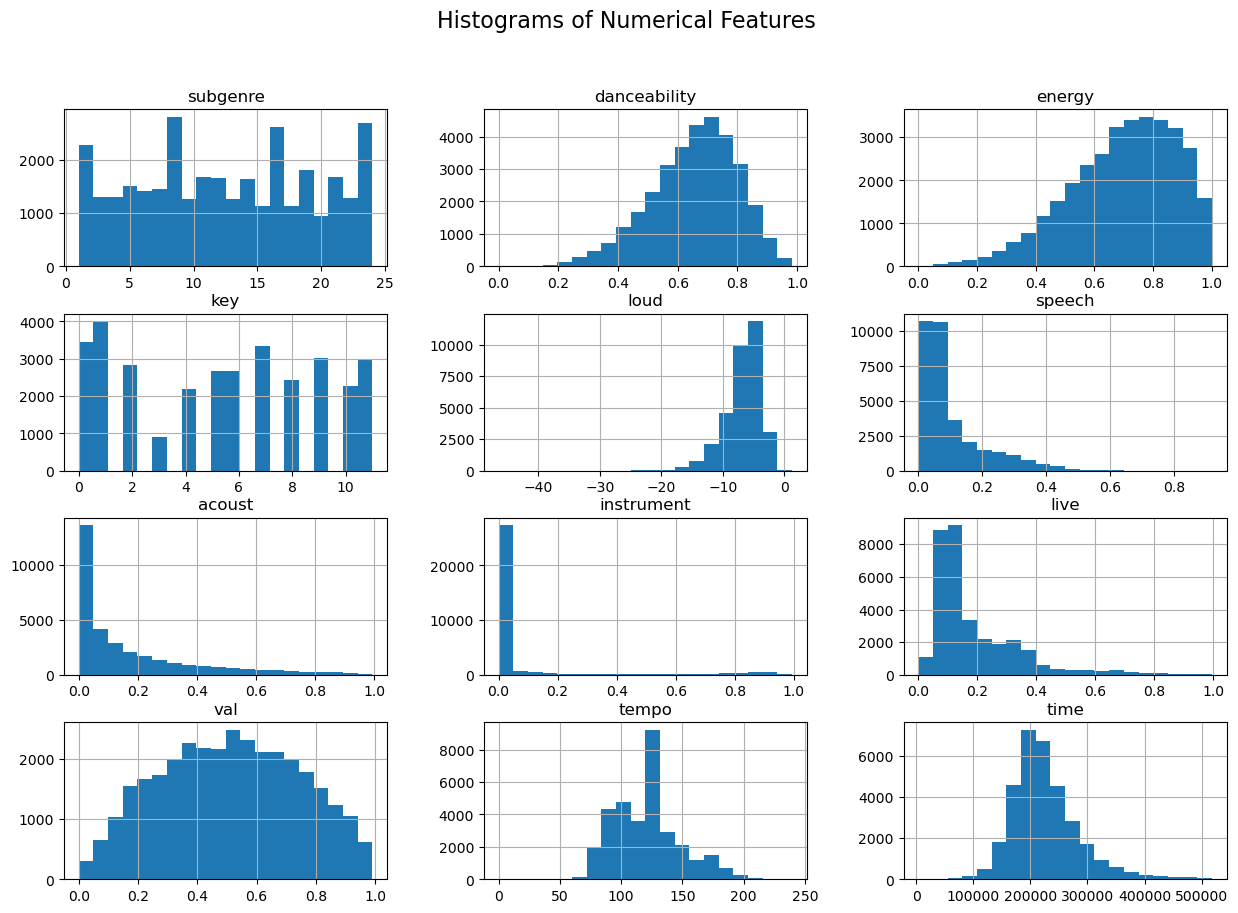

In [56]:
# Visualize various features using histograms, box plots, or scatter plots

# Histograms of numerical features
numerical_features = ['subgenre','danceability', 'energy', 'key', 'loud', 'speech', 'acoust', 'instrument', 'live', 'val', 'tempo', 'time']
df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

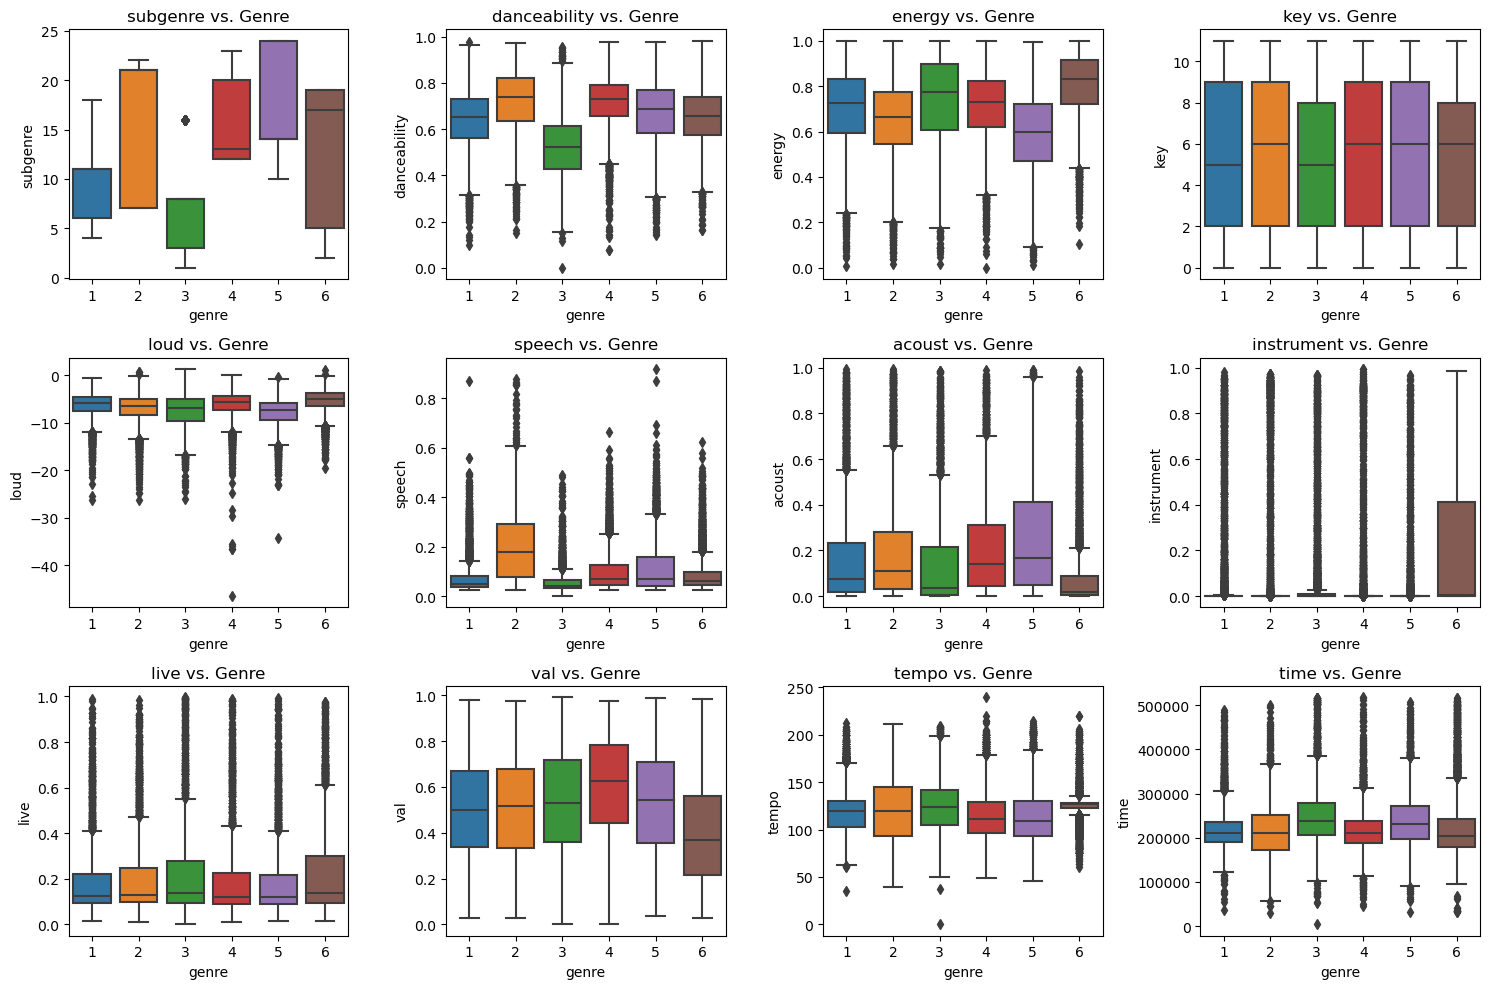

In [57]:
# Box plots for each numerical feature against the target variable 'genre'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='genre', y=feature, data=df)
    plt.title(f'{feature} vs. Genre')
plt.tight_layout()
plt.show()

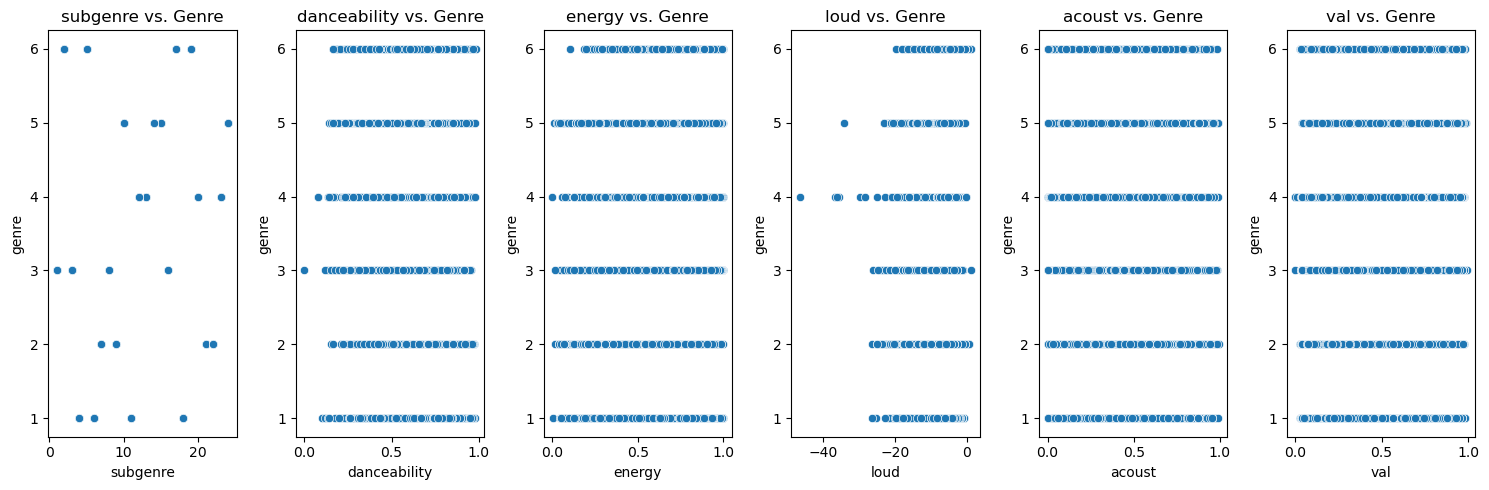

In [59]:
# Scatter plots for selected numerical features against 'genre'
selected_features = ['subgenre', 'danceability', 'energy', 'loud', 'acoust', 'val']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 6, i)
    sns.scatterplot(x=feature, y='genre', data=df)
    plt.title(f'{feature} vs. Genre')
plt.tight_layout()
plt.show()

C:\Users\SAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


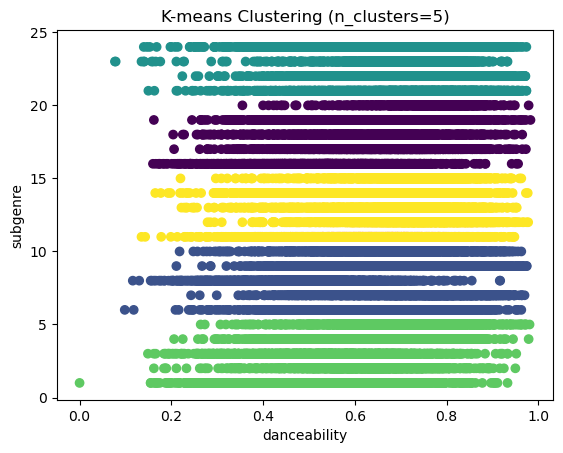

In [63]:
# Split the data into numerical features (X_cluster) for clustering
X_cluster = df.drop(['genre'], axis=1)

# Step 4: Clustering Analysis

from sklearn.cluster import KMeans

# Function to perform clustering and plot clusters
def perform_clustering_and_plot(X, n_clusters):
    # Initialize the K-means clustering algorithm
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)

    # Fit the model to the data
    kmeans.fit(X)

    # Get cluster assignments for each data point
    labels = kmeans.labels_

    # Plot the clusters (for 2D data, e.g., two features)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    plt.title(f'K-means Clustering (n_clusters={n_clusters})')
    plt.show()

# Preforming clustering and plotting clusters for different combinations of features

# Example 1: Using 'danceability' and 'subgenre' for clustering
perform_clustering_and_plot(X_cluster[['danceability', 'subgenre']], n_clusters=5)

C:\Users\SAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


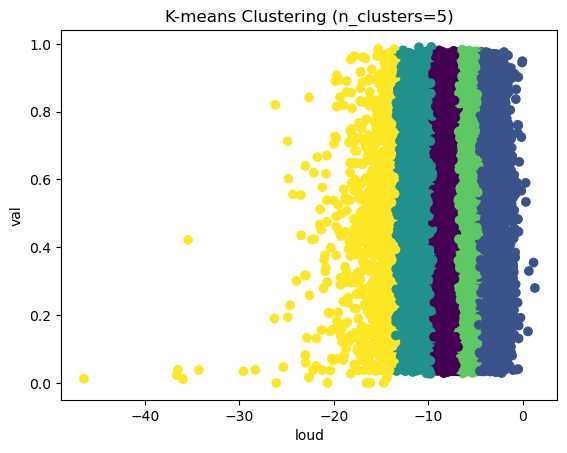

In [64]:
# # Example 2: Using 'loudness' and 'valence' for clustering
perform_clustering_and_plot(X_cluster[['loud', 'val']], n_clusters=5)

C:\Users\SAI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


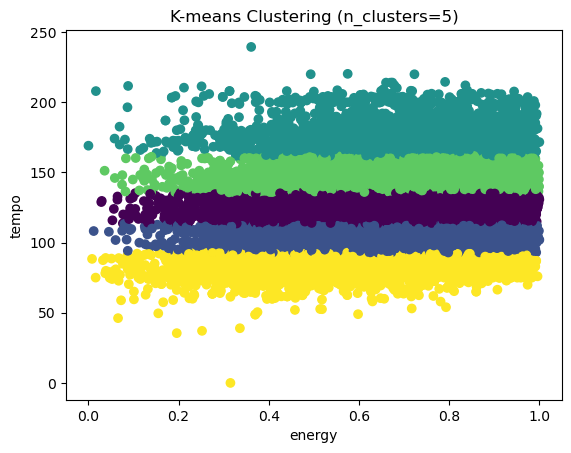

In [65]:
# # Example 3: Using 'energy' and 'tempo' for clustering
perform_clustering_and_plot(X_cluster[['energy', 'tempo']], n_clusters=5)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Separate features (X) and target variable (y)
X = df.drop('genre', axis=1)
y = df['genre']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Initialize the models
svm_model = SVC()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()

# Fit the models on the training data
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Making predictions on the test data
svm_preds = svm_model.predict(X_test)
knn_preds = knn_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate the models
svm_accuracy = accuracy_score(y_test, svm_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)
lr_accuracy = accuracy_score(y_test, lr_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

# Print the accuracies
print("Support Vector Machine Accuracy:", svm_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

Support Vector Machine Accuracy: 0.23861732906959038
K-Nearest Neighbors Accuracy: 0.2635906806761078
Decision Tree Accuracy: 1.0
Logistic Regression Accuracy: 0.17724988579259937
Random Forest Accuracy: 0.9509669559920816


In [67]:
models = {
    'SVM': svm_accuracy,
    'KNN': knn_accuracy,
    'Decision Tree': dt_accuracy,
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy
}

best_model = max(models, key=models.get)
print("Best Model:", best_model)

Best Model: Decision Tree
